In [182]:
import torch
from torch import nn
from matplotlib import pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal

%matplotlib inline

In [417]:
class GaussianProcess(nn.Module):
    def __init__(self, mean, lengthscale, noise=0.05):
        super(GaussianProcess, self).__init__()
        self.ls=lengthscale
        self.mean=mean
        self.var=noise**2

    def covar_matrix(self,x):
        K=torch.cdist(x.div(self.ls),x.div(self.ls),p=2).pow_(2).div_(-2).exp_()
        return K+self.var*torch.eye(x.shape[0])##
    
    def log_prob(self,inputs,f):
        GP_inputs=MultivariateNormal(loc=self.mean*torch.ones(inputs.shape[0]),covariance_matrix=self.covar_matrix(inputs))
        return GP_inputs.log_prob(f)
    def forward(self, inputs, n=1):
        GP_inputs=MultivariateNormal(loc=self.mean*torch.ones(inputs.shape[0]),covariance_matrix=self.covar_matrix(inputs))
        return GP_inputs.sample((n,)).squeeze()
    

In [418]:
GP=GaussianProcess(mean=torch.tensor(0.),lengthscale=1., noise=0.01)

torch.Size([500, 500])

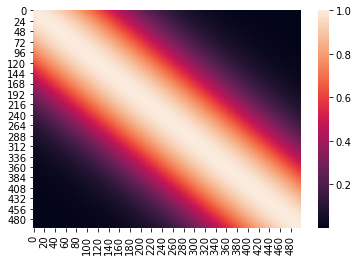

In [419]:
inputs=torch.linspace(-2,2,500).unsqueeze(-1)#(2*torch.rand((100,1))-1).sort(0)[0])
import seaborn as sns

sns.heatmap(GP.covar_matrix(inputs))
GP.covar_matrix(inputs).shape




In [420]:
f=GP(inputs,100)
GP.log_prob(inputs,f)

tensor([1534.0477, 1530.6770, 1561.9712, 1542.5061, 1541.7643, 1547.7843,
        1559.9979, 1561.9800, 1510.0645, 1562.6899, 1507.0938, 1530.8796,
        1537.9333, 1585.0939, 1555.8485, 1573.3944, 1546.7704, 1532.3242,
        1526.9480, 1549.6910, 1534.1398, 1545.2821, 1505.7845, 1547.3945,
        1551.2405, 1573.0341, 1517.1034, 1545.1399, 1516.4167, 1549.7593,
        1544.1216, 1531.1714, 1554.0293, 1556.5923, 1549.0652, 1516.4919,
        1562.9639, 1521.4082, 1541.9402, 1564.5100, 1496.3127, 1539.9124,
        1551.0117, 1572.0498, 1538.3517, 1562.9147, 1538.6132, 1561.9490,
        1553.7776, 1578.4214, 1540.8973, 1547.8784, 1541.1078, 1566.0593,
        1552.0511, 1544.5687, 1531.8167, 1560.7970, 1536.5046, 1558.2830,
        1549.8064, 1528.5311, 1550.3173, 1558.7620, 1540.4005, 1534.0208,
        1514.7500, 1542.4755, 1573.1425, 1529.5098, 1544.8149, 1543.3652,
        1567.3965, 1534.8070, 1575.5966, 1512.3534, 1564.4501, 1535.9556,
        1558.6868, 1551.2878, 1552.757

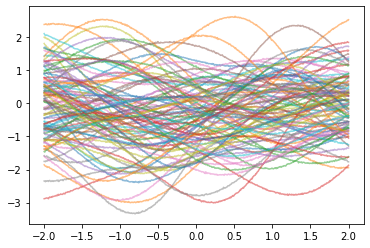

In [421]:
for i in range(100):
    plt.plot(inputs,GP(inputs),alpha=0.5)

In [422]:
GP=GaussianProcess(mean=torch.tensor(0.),lengthscale=1.,noise=0.01)

torch.Size([10, 10])

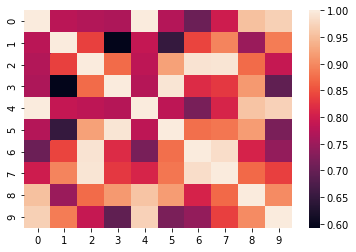

In [414]:
N=2
inputs=torch.rand(10,N)
import seaborn as sns

sns.heatmap(GP.covar_matrix(inputs))
GP.covar_matrix(inputs).shape




In [415]:
f=GP(inputs,10)
GP.log_prob(inputs,f)

tensor([ 7.9127, 10.9765, 10.1530,  8.2122, 10.0561,  8.1399,  3.6531,  5.1521,
        10.3911,  8.8258])

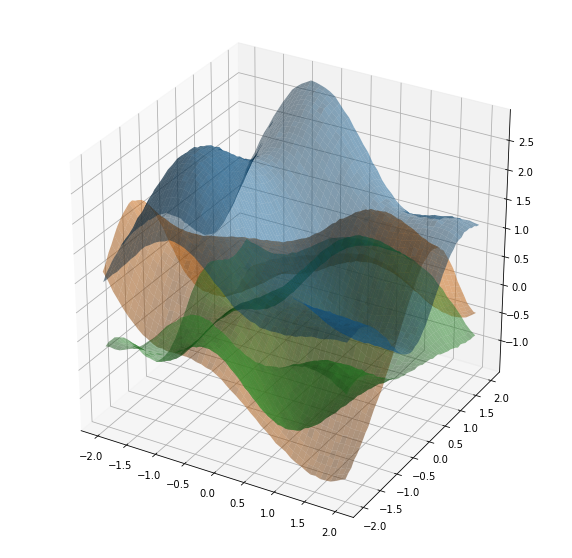

In [416]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
n=50
X=torch.linspace(-2,2,n)
XX,YY = torch.meshgrid(X,X)#torch.cartesian_prod(X, X)
XX_=torch.stack([XX,YY],dim=2).view(n**2,-1)
for i in range(3):
    ax.plot_surface(XX.numpy(),YY.numpy(),GP(XX_).view(n,n).numpy(),alpha=0.5)